## **Suicide Detection: Analyzing Text Data for Suicidal Intent**

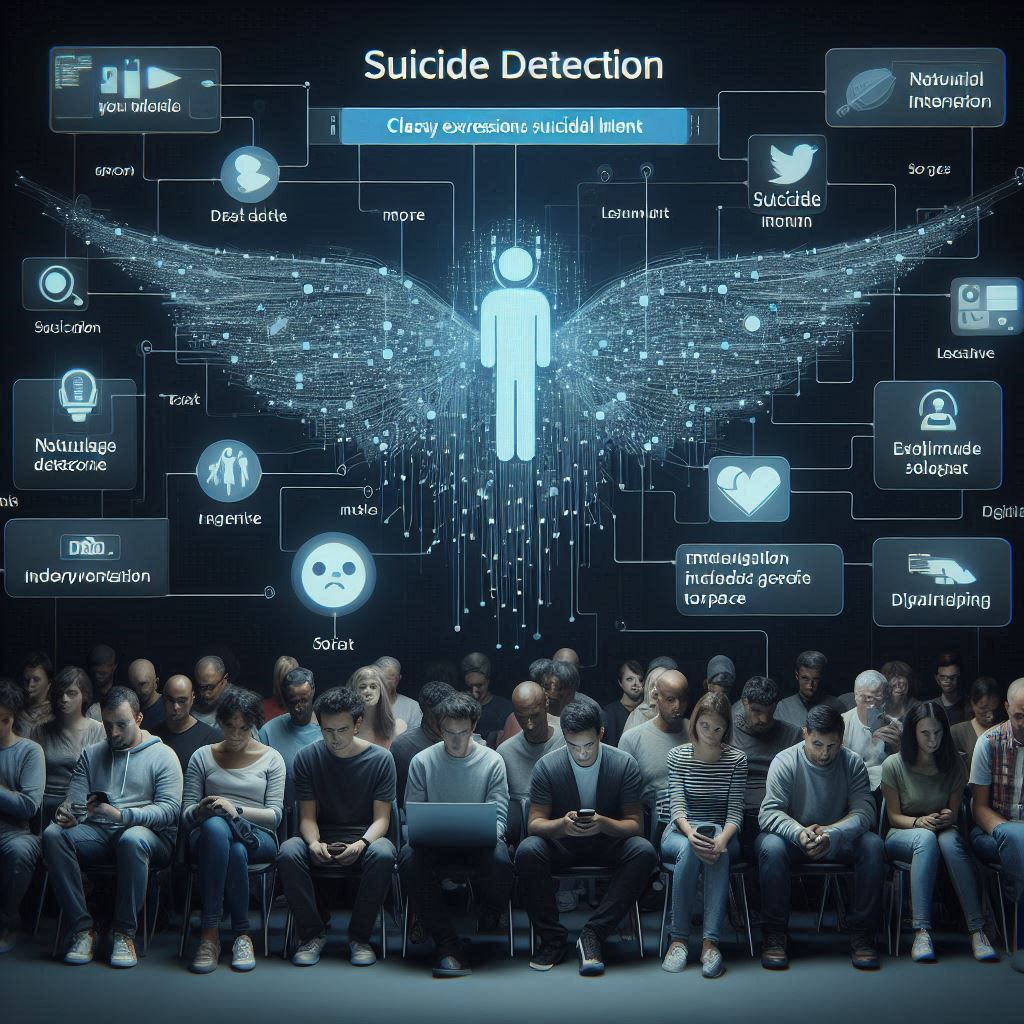

## **Table of Contents**
1. [Introduction](#introduction)
2. [Libraries and Tools](#libraries-and-tools)
3. [Data Loading and Initial Inspection](#data-loading-and-initial-inspection)
4. [Data Preprocessing](#data-preprocessing)
5. [Feature Engineering](#feature-engineering)
6. [Data Cleaning](#data-cleaning)
7. [Model Training and Evaluation](#model-training-and-evaluation)
8. [Conclusion](#conclusion)

## **Introduction**
The purpose of this project is to develop a machine learning model to classify text data and identify expressions of suicidal intent. By leveraging natural language processing techniques, the project aims to assist in early detection and intervention for individuals at risk of self-harm based on their digital communications.

## **Libraries and Tools**
Imported necessary libraries for data manipulation, visualization, text preprocessing, and machine learning

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


## **Data Loading and Initial Inspection**

In [2]:
# Checking the Initial rows of dataset
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('Suicide_Detection.csv')
df.head()

,Unnamed: 0,text,class
0,2,"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen.",suicide
1,3,Am I weird I don't get affected by compliments if it's coming from someone I know irl but I feel really good when internet strangers do it,non-suicide
2,4,"Finally 2020 is almost over... So I can never hear ""2020 has been a bad year"" ever again. I swear to fucking God it's so annoying",non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’ve been struggling for years and I’m afraid. Through these past years thoughts of suicide, fear, anxiety I’m so close to my limit . I’ve been quiet for so long and I’m too scared to come out to my family about these feelings. About 3 years ago losing my aunt triggered it all. Everyday feeling hopeless , lost, guilty, and remorseful over her and all the things I’ve done in my life,but thoughts like these with the little I’ve experienced in life? Only time I’ve revealed these feelings to my family is when I broke down where they saw my cuts. Watching them get so worried over something I portrayed as an average day made me feel absolutely dreadful. They later found out I was an attempt survivor from attempt OD(overdose from pills) and attempt hanging. All that happened was a blackout from the pills and I never went through with the noose because I’m still so afraid. During my first therapy I was diagnosed with severe depression, social anxiety, and a eating disorder.\nI was later transferred to a fucken group therapy for some reason which made me feel more anxious. Eventually before my last session with a 1 on 1 therapy she showed me my results from a daily check up on my feelings(which was a 2 - step survey for me and my mom/dad )\nCome to find out as I’ve been putting feeling horrible and afraid/anxious everyday , my mom has been doing I’ve been doing absolutely amazing with me described as “happiest she’s ever seen me, therapy has helped him” \nI eventually was put on Sertaline (anti anxiety or anti depression I’m sorry I forgot) but I never finished my first prescription nor ever found the right type of anti depressant because my mom thought I only wanted the drugs so she took me off my recommended pill schedule after ~3 week and stopped me from taking them. All this time I’ve been feeling worse afraid of the damage/ worry I’ve caused them even more. \nNow here with everything going on, I’m as afraid as I’ve ever been . I’ve relapsed on cutting and have developed severe insomnia . Day after day feeling more hopeless, worthless questioning why am I still here? What’s my motivation to move out of bed and keep going? I ask these to myself nearly every night almost having a break down everytime. \nPlease Please Please someone.. anyone help me.\nI’m so scared I might do something drastic, I’ve been shaped by fear and anxiety. Idk what to do anymore",suicide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [4]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0    0
text          0
class         0
dtype: int64


In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


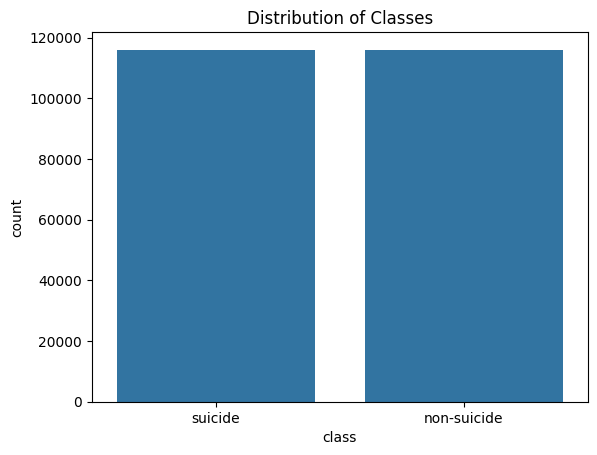

In [6]:
# Display the distribution of classes
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.show()

In [7]:
# Display basic statistics for text length
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())

count    232074.000000
mean        689.639736
std        1156.334007
min           3.000000
25%         138.000000
50%         315.000000
75%         801.000000
max       40297.000000
Name: text_length, dtype: float64


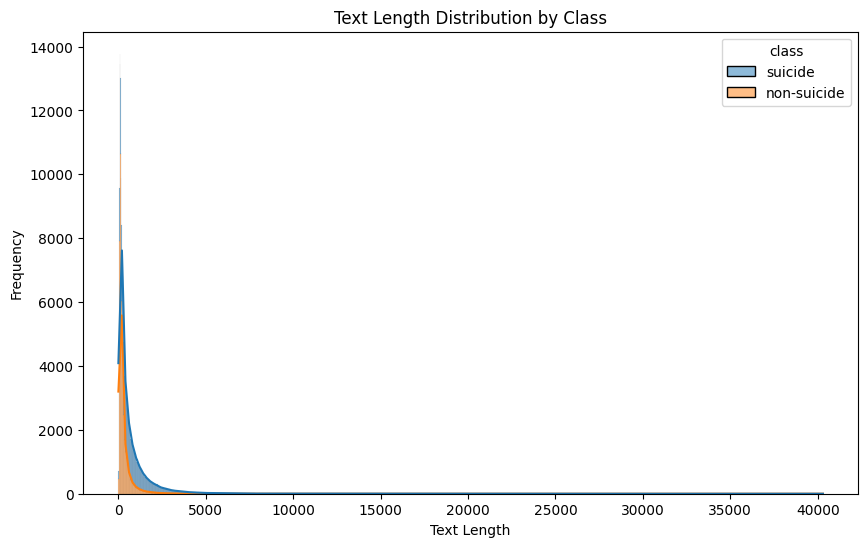

In [8]:
# Exploratory Data Analysis (EDA)
# Distribution of text length by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='class', multiple='stack', kde=True)
plt.title('Text Length Distribution by Class')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

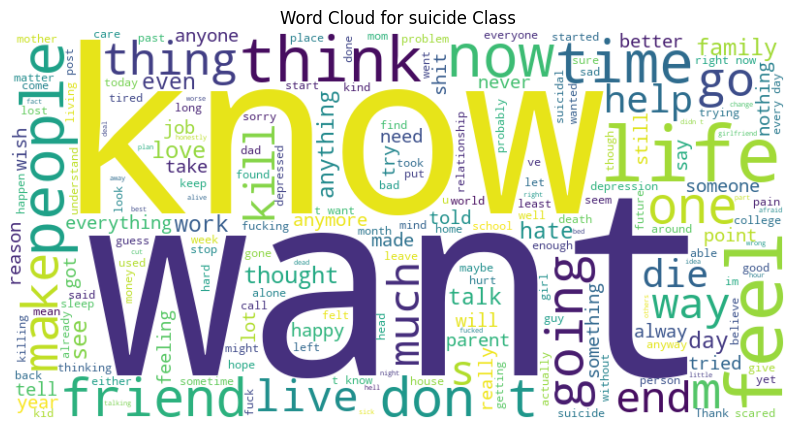

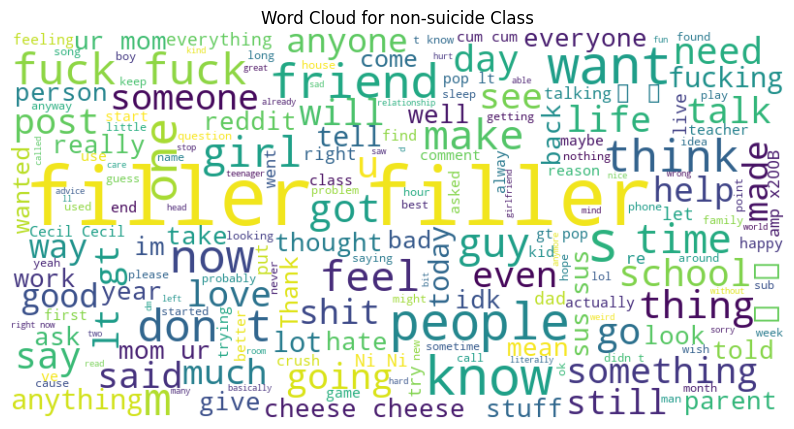

In [9]:
# Word cloud for each class
from wordcloud import WordCloud

def plot_wordcloud(class_label):
    text = ' '.join(df[df['class'] == class_label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {class_label} Class')
    plt.axis('off')
    plt.show()

plot_wordcloud('suicide')
plot_wordcloud('non-suicide')

## **Data Preprocessing**

In [10]:
# Import neccessary libraries for data preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

In [12]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalnum()]
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

In [13]:
# Apply the preprocessing function to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

In [14]:
# Display the first few rows of the processed text
print(df[['text', 'processed_text']].head())

## **Feature Engineering**

**Purpose:**<br>
Generate TF-IDF features from processed text and integrate them into the dataset.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

In [16]:
# Fit TF-IDF Vectorizer and transform the processed text
tfidf_features = tfidf_vectorizer.fit_transform(df['processed_text'])

In [17]:
# Convert TF-IDF features into a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [18]:
# Concatenate TF-IDF features with the original DataFrame
df = pd.concat([df, tfidf_df], axis=1)

In [19]:
# Display the updated DataFrame with TF-IDF features
print(df.head())

   Unnamed: 0  \
0           2   
1           3   
2           4   
3           8   
4           9   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## **Data Cleaning**

**Purpose:**<br>
Ensure data integrity by managing columns, dropping duplicates, and confirming correct formatting.

In [19]:
# Inspect the shape and content of the dataframe
print("Shape of the dataframe:", df.shape)
print(df.head())

Shape of the dataframe: (232074, 1005)
   Unnamed: 0  \
0           2   
1           3   
2           4   
3           8   
4           9   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [20]:
# Check the columns of the dataframe
print("Columns of the dataframe:", df.columns)

Columns of the dataframe: Index(['Unnamed: 0', 'text', 'class', 'text_length', 'processed_text', '10',
       '100', '12', '13', '14',
       ...
       'wrote', 'x200b', 'yeah', 'year', 'years', 'yes', 'yesterday', 'yet',
       'young', 'younger'],
      dtype='object', length=1005)


In [21]:
# Drop the unnecessary duplicated 'class' column
df = df.loc[:, ~df.columns.duplicated()]

In [22]:
# Check the shape and content of the dataframe after dropping duplicates
print("Shape of the dataframe after dropping duplicates:", df.shape)
print(df.head())

Shape of the dataframe after dropping duplicates: (232074, 1003)
   Unnamed: 0  \
0           2   
1           3   
2           4   
3           8   
4           9   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [23]:
# Check if the 'class' column has extra dimensions or is correctly formatted
print("Shape of 'class' column:", df['class'].shape)
print(df['class'].head())

Shape of 'class' column: (232074,)
0        suicide
1    non-suicide
2    non-suicide
3        suicide
4        suicide
Name: class, dtype: object


## **Model Training and Evaluation**

**Purpose:**<br>
Train a Logistic Regression classifier on the dataset and evaluate its performance.

## **Logistic Regression Model**

In [24]:
# Split data into training and testing sets
X = df.drop(['Unnamed: 0', 'text', 'processed_text', 'class'], axis=1)  # Features without text-related columns
y = df['class']  # Target variable
# Check the shape of y before splitting
print("Shape of y before splitting:", y.shape)

Shape of y before splitting: (232074,)


In [25]:
# Inspect the shape and content of y
print("Shape of y:", y.shape)
print(y.head())

Shape of y: (232074,)
0        suicide
1    non-suicide
2    non-suicide
3        suicide
4        suicide
Name: class, dtype: object


In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the shape of y_train to diagnose the issue
print("Shape of y_train after splitting:", y_train.shape)

Shape of y_train after splitting: (185659,)


In [27]:
# Fit Logistic Regression classifier on the training data
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Predict on the test data
y_pred = classifier.predict(X_test)

In [29]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

 non-suicide       0.91      0.93      0.92     23287
     suicide       0.92      0.91      0.92     23128

    accuracy                           0.92     46415
   macro avg       0.92      0.92      0.92     46415
weighted avg       0.92      0.92      0.92     46415

[[21587  1700]
 [ 2166 20962]]


## **Naive Bayes Model**

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
# Naive Bayes Model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

# Print classification report and confusion matrix for Naive Bayes
print("Naive Bayes Model:")
print(classification_report(y_test, nb_y_pred))
print(confusion_matrix(y_test, nb_y_pred))
print(f"Accuracy: {accuracy_score(y_test, nb_y_pred):.2f}")

Naive Bayes Model:
              precision    recall  f1-score   support

 non-suicide       0.84      0.87      0.86     23287
     suicide       0.87      0.83      0.85     23128

    accuracy                           0.85     46415
   macro avg       0.85      0.85      0.85     46415
weighted avg       0.85      0.85      0.85     46415

[[20366  2921]
 [ 3905 19223]]
Accuracy: 0.85


## **SVM Model**

In [31]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

# Generate some data for example
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# SVM Model
svm_classifier = svm.SVC(kernel='linear', probability=True)  # Set probability=True for decision_function or predict_proba
svm_classifier.fit(X_train, y_train)
svm_y_pred = svm_classifier.predict(X_test)

# Print classification report and confusion matrix for SVM
print("SVM Model:")
print(classification_report(y_test, svm_y_pred))
print(confusion_matrix(y_test, svm_y_pred))
print(f"Accuracy: {accuracy_score(y_test, svm_y_pred):.2f}")

SVM Model:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.79      0.92      0.85        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25

[[10  3]
 [ 1 11]]
Accuracy: 0.84


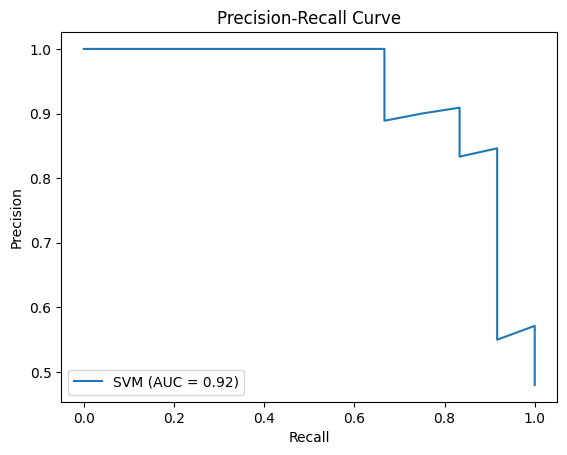

In [32]:
# Precision-Recall Curve for SVM
y_proba_svm = svm_classifier.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_proba_svm)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f'SVM (AUC = {roc_auc_score(y_test, y_proba_svm):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


## **Models testing**

In [ ]:
# Assuming models are correctly defined and imported
try:
    for i, user_text in enumerate(new_texts):
        print(f"Testing on text: {user_text}")
        for model_name, model in models.items():
            prediction = model.predict(X_new[i])
            print(f"{model_name} Prediction: {prediction[0]}")
        print("\n")
except Exception as e:
    print(f"Error occurred during prediction: {str(e)}")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Function to preprocess the input text
def preprocess_text(text):
    processed_text = text.lower()  # Example: converting text to lowercase
    return processed_text

# Example new data
new_texts = [
    "I am feeling very low and have thoughts of ending it all.",
    "Life is good and I am happy.",
    "I need help, everything seems hopeless."
]

# Preprocess the new texts
preprocessed_texts = [preprocess_text(text) for text in new_texts]

# Load or fit the vectorizer used in your project
vectorizer = TfidfVectorizer()
vectorizer.fit(df['processed_text'])  # Fit on the processed text column of your original dataframe
X_new = vectorizer.transform(preprocessed_texts)

# Define model names and corresponding models
models = {
    "SVM": svm_classifier,
    "Naive Bayes": nb_classifier,
    "Logistic Regression": classifier
}

# Iterate through each new text and make predictions
try:
    for i, user_text in enumerate(new_texts):
        print(f"Testing on text: {user_text}")
        for model_name, model in models.items():
            prediction = model.predict(X_new[i])
            print(f"{model_name} Prediction: {prediction[0]}")
        print("\n")
except Exception as e:
    print(f"Error occurred during prediction: {str(e)}")


# **Conclusion**
This project underscores the potential of machine learning and natural language processing in detecting and mitigating risks associated with suicidal behavior through digital communication analysis. By leveraging these technologies, we can augment existing support systems and provide proactive assistance to individuals in distress, ultimately contributing to mental health advocacy and suicide prevention efforts.